## Global Equities Momentum (GEM)

Gary Antonacci’s Dual Momentum approach is simple: by combining both relative momentum and absolute momentum (i.e. trend following), Dual Momentum seeks to rotate into areas of relative strength while preserving the flexibility to shift entirely to safety assets (e.g. short-term U.S. Treasury bills) during periods of pervasive, negative trends.

Antonacci’s Global Equities Momentum (GEM) portfolio builds a portfolio with three assets: U.S. stocks, international stocks and U.S. bonds. For the retail investor he recommends using low-cost ETFs: for example, VOO for U.S. stocks; VEU for non-U.S. stocks and AGG for U.S. aggregate bonds.  Compare against a global equities benchmark like the ACWI ETF. 

Antonacci named his system “Dual Momentum” because he uses both relative momentum (the measure of the performance of an asset relative to another asset) and absolute momentum ( the measure of performance relative to the risk-free rate – absolute excess return.)  To keep the process very simple to implement, he used a 12-month look-back period and an easy to execute buy and sell system.

Every month the investor places all funds in the equity ETF that has the best 12-month performance relative to the other equity ETFs, unless the absolute performance is worse than the return of six-month U.S. Treasuries (as measured by BIL ETF).  If absolute performance is below the BIL ETF, then the investor places all funds in AGG, the aggregate bond index.

https://www.theemergingmarketsinvestor.com/using-momentum-in-emerging-markets/  
https://blog.thinknewfound.com/2019/01/fragility-case-study-dual-momentum-gem/  
https://seekingalpha.com/article/4010394-prospecting-dual-momentum-gem
    
Note that this methods have NOT done so well since 2018, and especially didn't handle the COVID downturn very well.

    Optimize: number of lookback months.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbols = {'US STOCKS' : 'SPY',  'US BONDS' : 'AGG', 'EX-US STOCKS' : 'VEU', 'T-BILL': 'BIL'}

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
#end = datetime.datetime.now()
end = datetime.datetime(2019, 1, 1)

Define Optimizations

In [4]:
# Pick one
optimize_lookback = True

if optimize_lookback:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

In [5]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'lookback': None,
    'margin': 1,
}
options

{'use_adj': True, 'use_cache': True, 'lookback': None, 'margin': 1}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_lookback:
        options['lookback'] = int(X)
        
    strategies[X] = strategy.Strategy(symbols, capital, start, end, options) 
    strategies[X].run()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,10.76,8.27,11.41,8.22,7.78,6.39,5.79,6.06,7.62,8.85,7.30,7.88,7.82,10.16,11.15,8.82
max_closed_out_drawdown,-21.94,-23.78,-17.88,-20.12,-19.31,-23.05,-22.31,-21.13,-23.12,-23.67,-23.73,-22.32,-22.33,-25.88,-20.66,-24.87
annualized_return_over_max_drawdown,0.49,0.35,0.64,0.41,0.40,0.28,0.26,0.29,0.33,0.37,0.31,0.35,0.35,0.39,0.54,0.35
drawdown_recovery_period,632.00,632.00,515.00,Not Recovered Yet,395.00,639.00,772.00,705.00,490.00,434.00,525.00,164.00,164.00,346.00,Not Recovered Yet,Not Recovered Yet
best_month,17.57,17.58,17.57,17.58,17.58,17.58,11.08,11.08,10.45,10.27,10.28,14.12,14.13,14.07,14.07,13.42
worst_month,-11.19,-11.22,-11.18,-11.23,-17.52,-16.23,-16.24,-16.18,-16.21,-16.26,-15.58,-16.81,-16.82,-17.52,-16.21,-16.20
sharpe_ratio,0.81,0.67,0.88,0.66,0.59,0.51,0.48,0.49,0.60,0.66,0.57,0.59,0.58,0.72,0.80,0.67
sortino_ratio,1.02,0.83,1.11,0.83,0.71,0.63,0.59,0.60,0.74,0.82,0.70,0.71,0.71,0.87,0.99,0.82
monthly_std,3.42,3.24,3.18,3.17,3.50,3.41,3.21,3.42,3.31,3.46,3.38,3.48,3.45,3.52,3.43,3.42
pct_time_in_market,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.92


Bar graphs

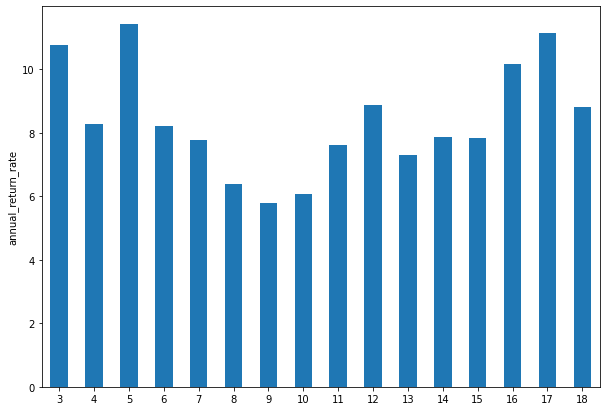

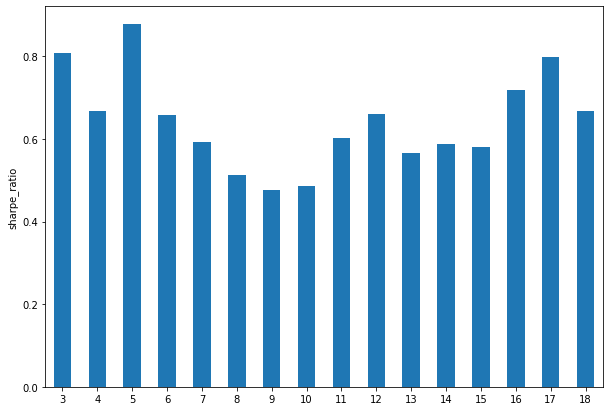

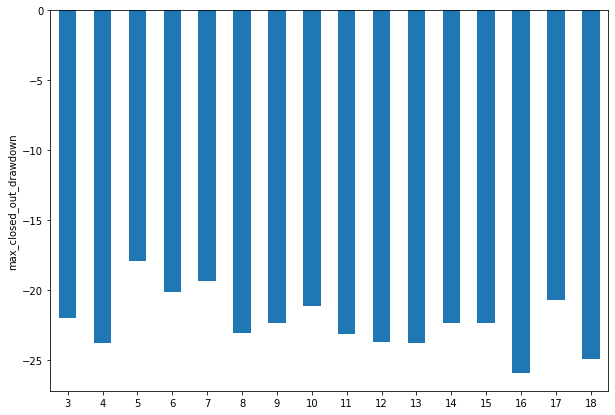

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('ACWI', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Equity curve

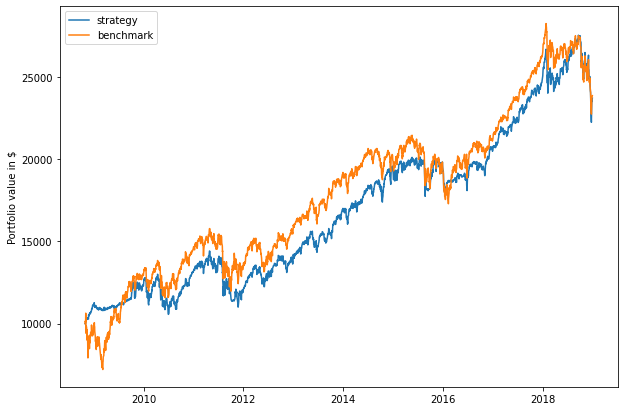

In [10]:
if optimize_lookback: Y = '12'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [11]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        if optimize_lookback:
            label=strategy.options['lookback']
        axes.plot(strategy.dbal['close'], label=label)

    plt.legend(loc='best')

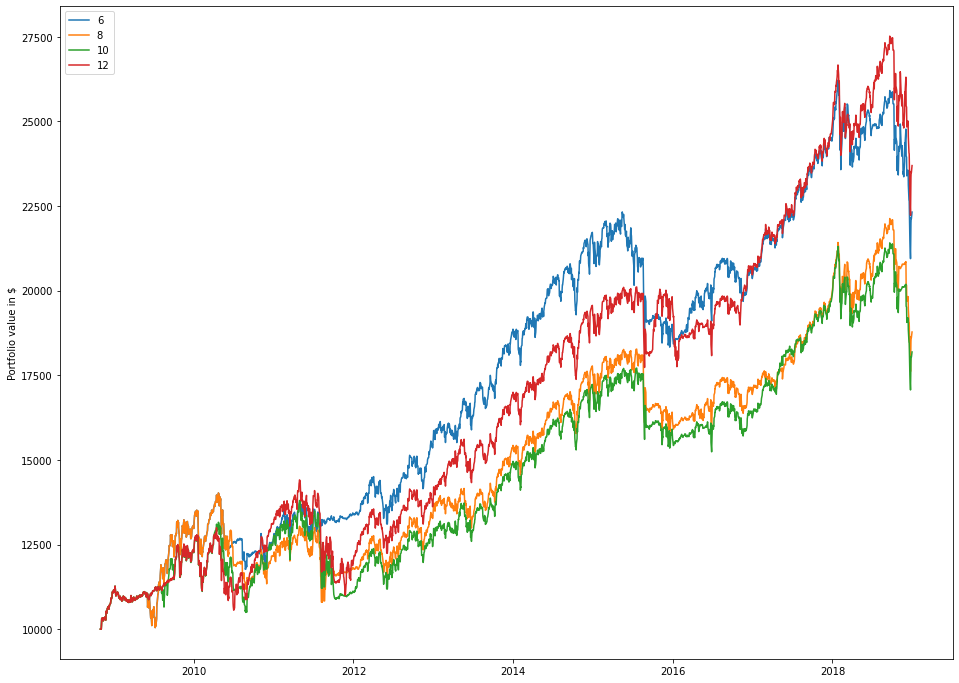

In [12]:
plot_equity_curves(strategies[3:10:2])